In [1]:
# loading packages

# utils
import pandas as pd
import warnings

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

# display preference for ipynbs
%matplotlib inline

In [2]:
load_path = "../../data/cleaned_gw_reviews.csv"

In [3]:
# ensure the dates are parsed correctly with parse_dates argument
reviews = pd.read_csv(load_path, parse_dates = ["date_of_review", "date_flown"])

In [4]:
reviews.head()

,title,review_value,n_user_reviews,reviewer_name,reviewer_country,date_of_review,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort_rating,cabin_staff_service_rating,food_and_beverages_rating,inflight_entertainment_rating,ground_service_rating,value_for_money_rating,recommendation
0,"""Seat was fine with enough legroom""",7.0,8 reviews,Sander van Kan,Netherlands,2019-07-01,✅ Trip Verified | Dusseldorf to Berlin. Eurowi...,A319,Couple Leisure,Economy Class,Dusseldorf to Berlin,2019-06-01,4.0,3.0,NaN,1.0,3.0,5.0,yes
1,"""crew were smiling and good""",6.0,8 reviews,Sander van Kan,Netherlands,2019-07-01,✅ Trip Verified | Berlin to Dusseldorf. Eurowi...,A319,Couple Leisure,Economy Class,Berlin to Dusseldorf,2019-06-01,3.0,3.0,NaN,1.0,3.0,5.0,yes
2,"""only two agents available""",1.0,6 reviews,Andrew Maynard,United Kingdom,2017-01-04,Check in process at Cologne very poor. Flight ...,NaN,Couple Leisure,Economy Class,CGN to MAN,2017-01-01,2.0,2.0,NaN,NaN,1.0,2.0,no
3,"""good flight and friendly staff""",7.0,1 reviews,T Steen,Netherlands,2016-09-13,✅ Verified Review | Amsterdam to Stuttgart. G...,NaN,Business,Economy Class,AMS to STR,2016-09-01,5.0,5.0,1.0,NaN,5.0,5.0,yes
4,"""never been treated as badly""",1.0,NaN,Karen Kirner,Austria,2016-08-16,✅ Verified Review | I have been a frequent tr...,NaN,Business,Economy Class,DUS to VIE,2016-08-01,1.0,1.0,NaN,NaN,3.0,1.0,no


#### EDA

Explore ratings, recommendations, and other parts of the data to get to know it better.

In [12]:
# the current version of plotnine relies on a matplotlib function
# that throws a warning everytime something is plotted. 
# ignore warnings to hide these, even if some useful warning
# messages may be ignored
warnings.filterwarnings('ignore')


Recommendation will likely be the response variable, check out the counts to see if data is imbalanced.

It appears to be fairly balanced, so no cost function balancing or other imbalance correction will be needed.

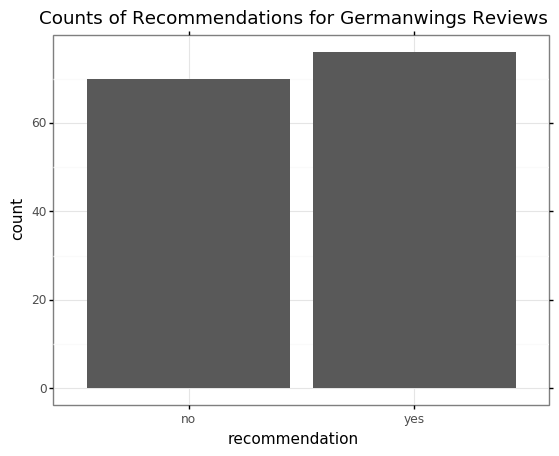

<ggplot: (-9223371891537976376)>

In [13]:
(ggplot(reviews, aes(x = "recommendation"))
 + geom_bar()
 + theme_bw()
 + labs(title = "Counts of Recommendations for Germanwings Reviews")
)

Explore the review value based on `recommendation`.

It appears that a review value of around 4.5 is where the recommendation moves from no to yes.  Although there is some overlap, review value is likely a strong predictor for recommendation.

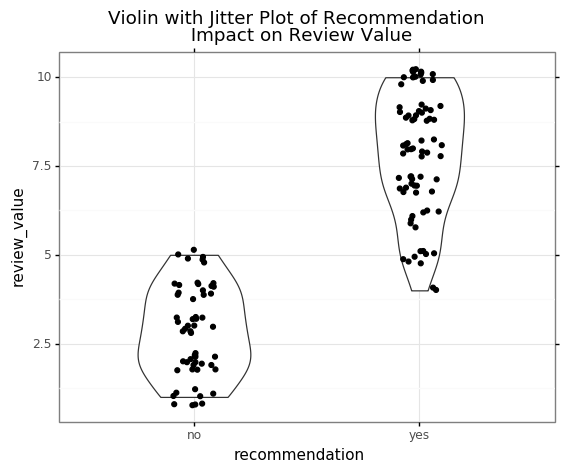

<ggplot: (-9223371891536657250)>

In [61]:
(ggplot(reviews, aes(y = "review_value", x = "recommendation")) 
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Violin with Jitter Plot of Recommendation \n Impact on Review Value")
)

See if people from different countries are likely to give a more positive or negative review.

There seems to be no real trend here, mostly due to the small sample size of the data.

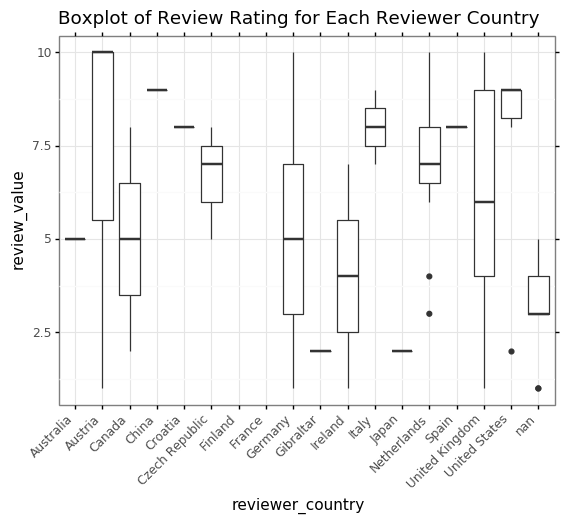

<ggplot: (-9223371891536802521)>

In [62]:
(ggplot(reviews, aes(x = "reviewer_country", y = "review_value")) 
 + geom_boxplot()
 + theme_bw()
 + theme(axis_text_x = element_text(rotation = 45, hjust = 1))
 + labs(title = "Boxplot of Review Rating for Each Reviewer Country")
)

Look at the review value over time.  We are using the date of review in place for date flown due to missing values for the date flown and analysis performed in `verify_and_clean.ipynb`

There seems to be an uptick in review value from this sample inbetween 2008 and 2011, but otherwise seems fairly steady thereon.  The large dip at the end has a lack of data as evidenced by the large confidence interval bounds.

While the curve does oscillate in the middle, the 95% confidence interval is still somewhat large enough to approximate a straight line, so I can't say if there was a dip around 2013.

I chose to use a Loess regression in order to get an idea of what's happening with the scatter, choosing a span to create a line that doesn't oscillate too much and still captures the general trend.

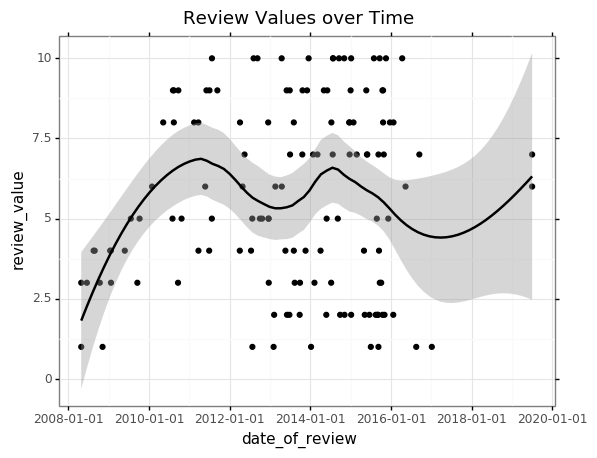

<ggplot: (-9223371891537988499)>

In [63]:
(ggplot(reviews, aes(x = "date_of_review", y = "review_value"))
 + geom_point()
 + geom_smooth(span = 0.6) # using Loess as a local smoother
 + theme_bw()
 + labs(title = "Review Values over Time")
)


Look at the recommendation over time.  We are using the date of review in place for date flown due to missing values for the date flown and analysis performed in `verify_and_clean.ipynb`

It is interesting inbetween 2011 and 2013, there are a lot more positive reviews than negative reviews.  Maybe something during this time period resulted in the airline doing something very right.  Might be worth looking into.

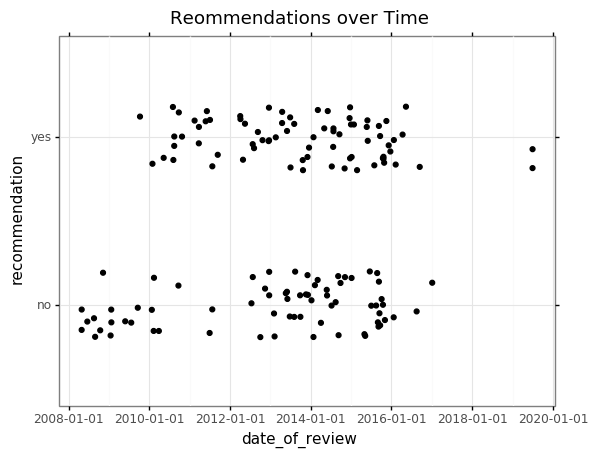

<ggplot: (-9223371891536216141)>

In [75]:
(ggplot(reviews, aes(x = "date_of_review", y = "recommendation"))
 + geom_jitter(height = 0.2)
 + theme_bw()
 + labs(title = "Reommendations over Time")
)


See the amount of reviews per date; if the 2011 to 2013 period is anomalous then maybe something else is going on here.

There seem to be a low amount of reviews that doesn't really fit with the trend between 2011 and 2013 - I would assume that `airlinequality.com` was gaining in popularity since 2008, therefore the increase in amount of reviews.

The dropoff after 2016 is likely due to this message: (found in the reviews)

```
PLEASE REFER TO EUROWINGS
SKYTRAX Editor (United Kingdom) 8th February 2016
Germanwings operations have now been transferred to and taken over by Eurowings. You can read their reviews here » Eurowings Customer Reviews
```

It seems that the company was bought by Eurowings during that time - this also means that all reviews after this date are suspect.  Using this insight I will remove all reviews after this time in the analysis going forward.

Typically I would modify my `verify_and_clean` notebook, but I would like to preserve this graph and analysis.

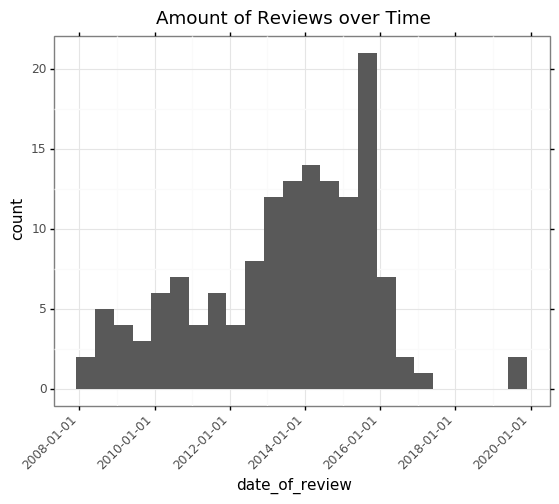

<ggplot: (145320283912)>

In [76]:
(ggplot(reviews, aes(x = "date_of_review"))
 + geom_histogram(binwidth = 365/2)
 + theme_bw()
 + theme(axis_text_x = element_text(rotation = 45, hjust = 1))
 + labs(title = "Amount of Reviews over Time")
)

Finally, I'll see if any of the other ratings seem to have a large effect on the recommendation.

Discussion for each plot will be below the plot.

In [78]:
reviews.columns

Index(['title', 'review_value', 'n_user_reviews', 'reviewer_name',
       'reviewer_country', 'date_of_review', 'review_text', 'aircraft',
       'traveller_type', 'seat_type', 'route', 'date_flown',
       'seat_comfort_rating', 'cabin_staff_service_rating',
       'food_and_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'value_for_money_rating', 'recommendation'],
      dtype='object')

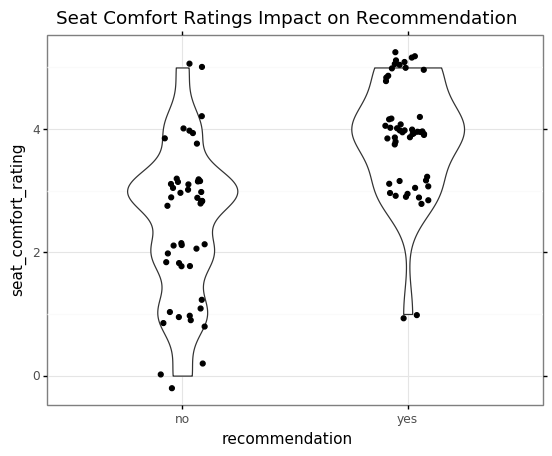

<ggplot: (145319738453)>

In [82]:
(ggplot(reviews, aes(x = "recommendation", y = "seat_comfort_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Seat Comfort Ratings Impact on Recommendation")
)

Seat comfort seems to be a factor in people recommending the airline or not.  Although there is overlap between people who found the seats comfy and still would not recommend the airline.

One thing to keep in mind is that if people liked the airline overall, they may rate it highly in all aspects even if the seat comfort was not 5 star.  The opposite is also likely true, but this is difficult to prove.  With more time I could dig into this. 

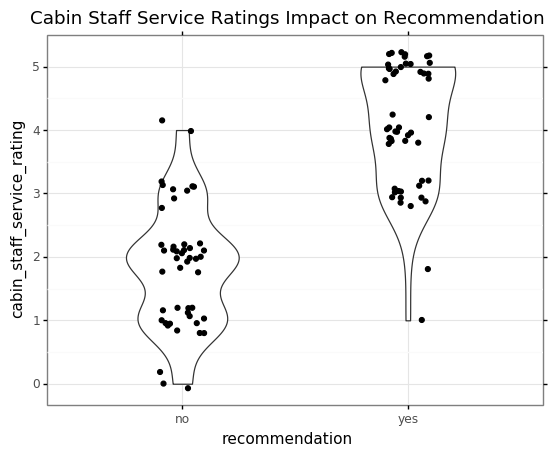

<ggplot: (-9223371891534688445)>

In [83]:
(ggplot(reviews, aes(x = "recommendation", y = "cabin_staff_service_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Cabin Staff Service Ratings Impact on Recommendation")
)

Staff service ratings seems to be a large part of recommending the airline or not, and it has even less overlap then seat comfort.  This indicates that service quality is a large part of people recommending the airline.

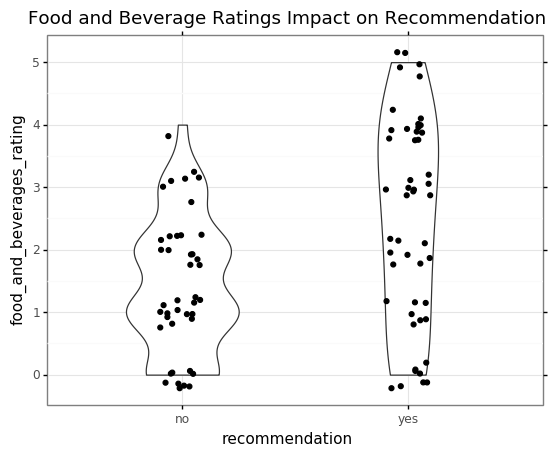

<ggplot: (145319735500)>

In [84]:
(ggplot(reviews, aes(x = "recommendation", y = "food_and_beverages_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Food and Beverage Ratings Impact on Recommendation")
)

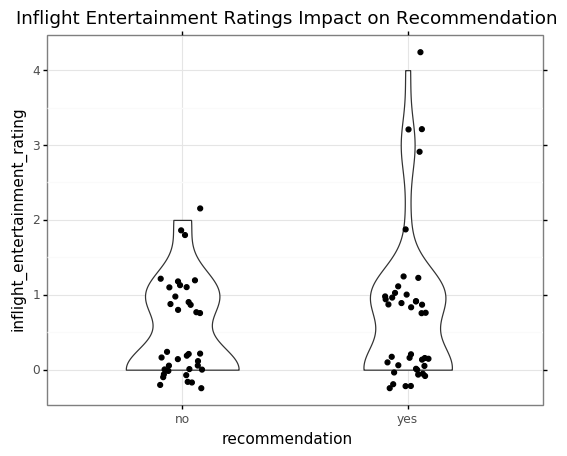

<ggplot: (145321292969)>

In [85]:
(ggplot(reviews, aes(x = "recommendation", y = "inflight_entertainment_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Inflight Entertainment Ratings Impact on Recommendation")
)

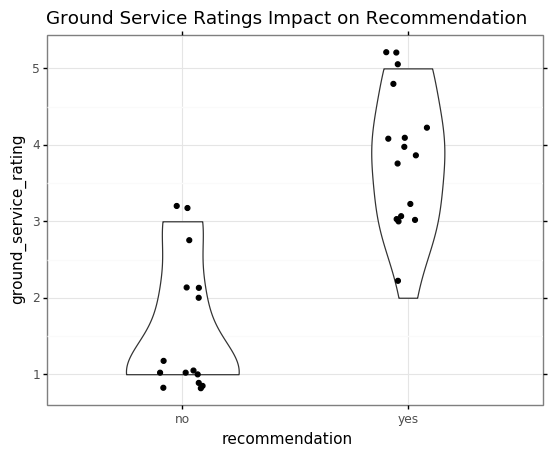

<ggplot: (-9223371891534700000)>

In [86]:
(ggplot(reviews, aes(x = "recommendation", y = "ground_service_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Ground Service Ratings Impact on Recommendation")
)

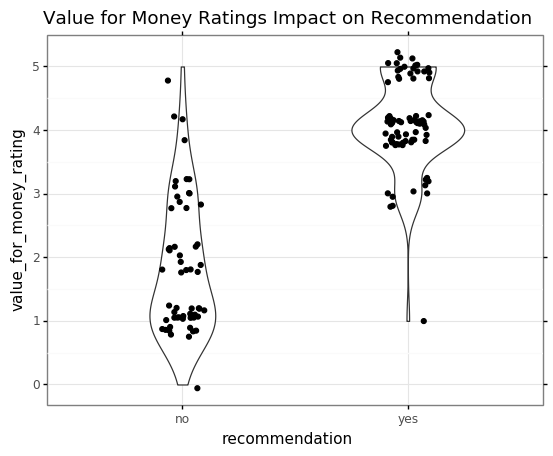

<ggplot: (145319738467)>

In [87]:
(ggplot(reviews, aes(x = "recommendation", y = "value_for_money_rating"))
 + geom_violin(width = 0.5)
 + geom_jitter(width = 0.1, height = 0.25)
 + theme_bw()
 + labs(title = "Value for Money Ratings Impact on Recommendation")
)